In [3]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

symbol = 'TQQQ'
files = sorted(os.listdir(f'data/{symbol}'), key=lambda f: f'{f:>7}')


In [10]:
results = []
leverage = {}
for f in files:
    df = pd.read_csv(f'data/{symbol}/{f}')
    df.start_date = pd.to_datetime(df.start_date)
    df.end_date = pd.to_datetime(df.end_date)
    df['TTL'] = ((df.end_date - df.start_date).dt.days / 7).round(0)
    call_profits = df.call_end_price / df.call_start_price - 1
    mean_call_profit = call_profits.mean()
    annual_call_profit = (call_profits / df.TTL * 52).mean()
    positive_ratio = (call_profits > 0).mean()
    call_leverage = (df.call_strike_price / df.call_start_price).median()
    print(f'[{f:>7}] '
          f'mean profit: {mean_call_profit:+5.0%} '
          f'annual profit: {annual_call_profit:+6.0%} '
          f'positive: {positive_ratio:5.0%} '
          f'leverage: {call_leverage:4.1f} '
        #   f'daily tx: {df.call_daily_tx.median():4.0f} '
          f'transactions: {len(df):3d} ')
    results.append({
        'profit': mean_call_profit,
        'positive': positive_ratio,
    })

    w = int(re.match(r'\d+', f)[0])
    leverage[w] = call_leverage

[ 1w.csv] mean profit:  +20% annual profit: +1033% positive:   40% leverage: 34.8 transactions: 103 
[ 2w.csv] mean profit:  +21% annual profit:  +546% positive:   39% leverage: 22.7 transactions: 102 
[ 3w.csv] mean profit:  +27% annual profit:  +472% positive:   40% leverage: 17.6 transactions: 101 
[ 4w.csv] mean profit:  +31% annual profit:  +406% positive:   42% leverage: 15.7 transactions: 100 
[ 5w.csv] mean profit:  +33% annual profit:  +347% positive:   43% leverage: 14.0 transactions:  98 
[ 6w.csv] mean profit:  +39% annual profit:  +340% positive:   46% leverage: 12.6 transactions:  97 
[ 7w.csv] mean profit:  +52% annual profit:  +386% positive:   49% leverage: 11.7 transactions:  57 
[ 8w.csv] mean profit:  +36% annual profit:  +236% positive:   48% leverage: 10.9 transactions:  23 
[ 9w.csv] mean profit:  +46% annual profit:  +267% positive:   45% leverage: 10.8 transactions:  22 
[10w.csv] mean profit:  +54% annual profit:  +281% positive:   45% leverage:  8.5 transacti

In [5]:
leverage

{1: 34.75609756097561,
 2: 22.673160173160174,
 3: 17.605633802816904,
 4: 15.73214901690238,
 5: 14.029649595687331,
 6: 12.614678899082568,
 7: 11.707317073170733,
 8: 10.9375,
 9: 10.825791855203619,
 10: 8.482142857142858,
 11: 8.16326530612245,
 12: 7.317826265953068,
 13: 7.170761797059731,
 14: 6.511875033207588,
 15: 7.40952380952381,
 16: 6.41399416909621,
 17: 7.204610951008645,
 18: 6.633849038912331,
 19: 6.763191763191763,
 20: 6.961191961191961,
 21: 6.411483253588518,
 22: 6.459131545338442,
 23: 5.658529766634295,
 24: 5.612134344528711,
 25: 4.963924963924963,
 26: 4.906204906204906}

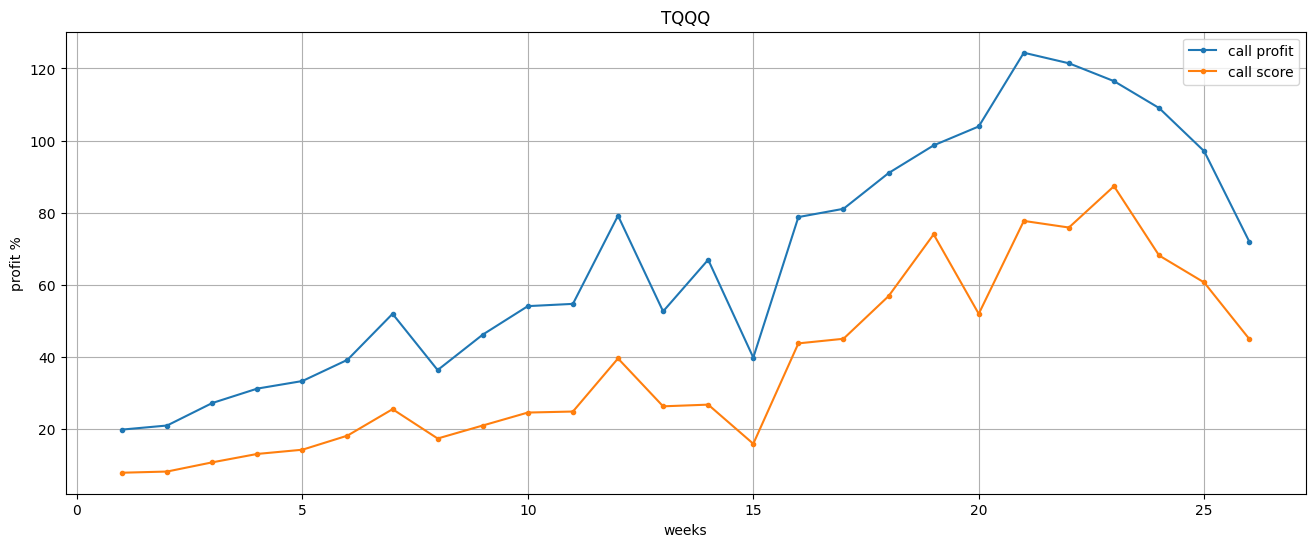

In [6]:
plt.figure(figsize=(16,6))
plt.plot([None]+[r['profit'] * 100 for r in results], label='call profit', marker='.')
plt.plot([None]+[r['profit'] * r['positive'] * 100 for r in results], label='call score', marker='.')
plt.legend(loc='best')
plt.title(symbol)
plt.xlabel('weeks')
plt.ylabel('profit %')
plt.grid()
plt.show()

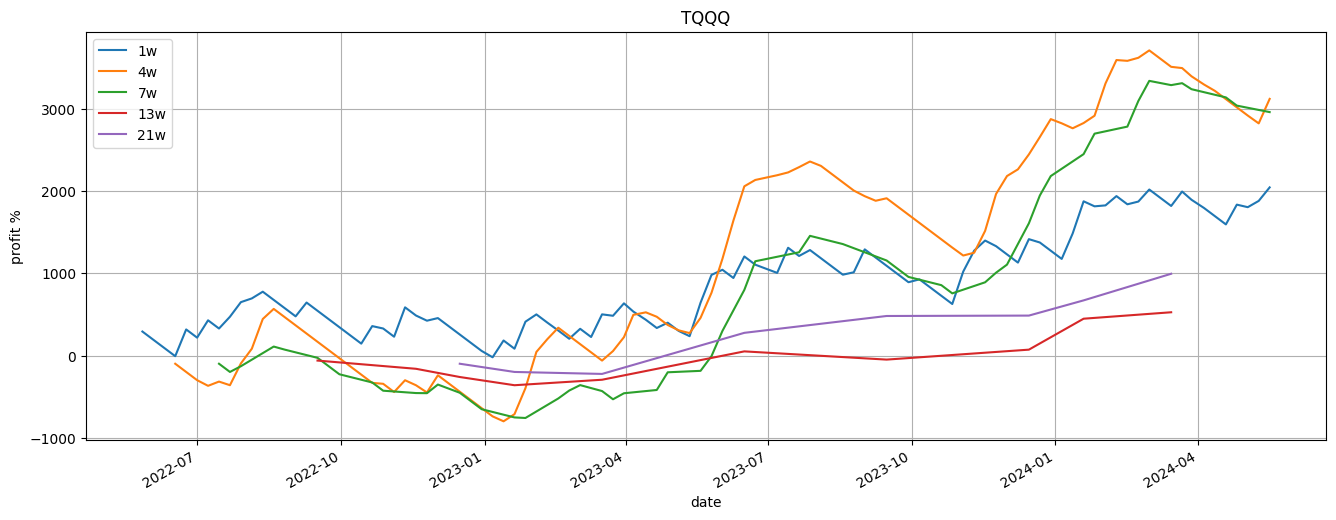

In [7]:
plt.figure(figsize=(16,6))

for n in [1,4,7,13,21]:
    k = f'{n}w'
    df = pd.read_csv(f'data/{symbol}/{k}.csv')
    df.end_date = pd.to_datetime(df.end_date)
    df = df.set_index('end_date')
    df[k] = (df.call_end_price / df.call_start_price - 1) * 100
    df[k].cumsum().plot()

plt.legend(loc='best')
plt.title(symbol)
plt.xlabel('date')
plt.ylabel('profit %')
plt.grid()
plt.show()

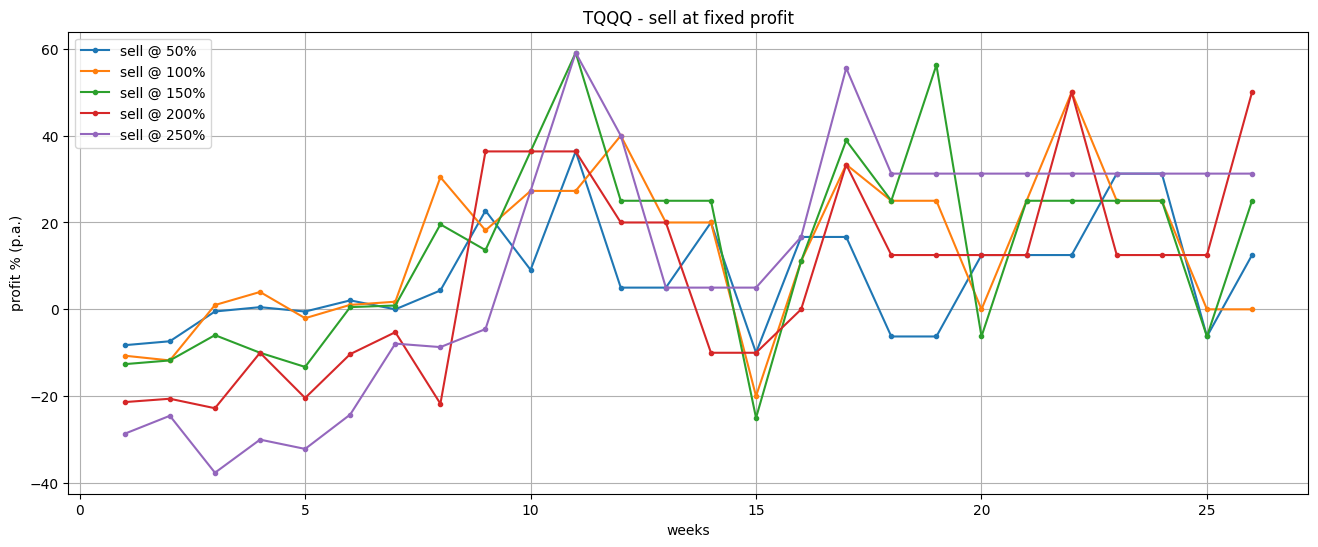

In [8]:
profit_thresholds = [0.5,1,1.5,2,2.5]
results = []
for f in files:
    df = pd.read_csv(f'data/{symbol}/{f}')
    df.start_date = pd.to_datetime(df.start_date)
    df.end_date = pd.to_datetime(df.end_date)
    df['TTL'] = ((df.end_date - df.start_date).dt.days / 7).round(0)
    call_max_profits = df.call_max_price / df.call_start_price - 1
    weeks = df.TTL.median()
    r = {}
    for p in profit_thresholds:
        q = (call_max_profits >= p).mean()
        r[p] = (q * (p + 1) - 1) #* 52 / weeks
    results.append(r)

plt.figure(figsize=(16,6))

for p in profit_thresholds:
    plt.plot([None]+[r[p] * 100 for r in results], label=f'sell @ {p:.0%}', marker='.')

plt.legend(loc='best')
plt.title(symbol + ' - sell at fixed profit')
plt.xlabel('weeks')
plt.ylabel('profit % (p.a.)')
plt.grid()
plt.show()

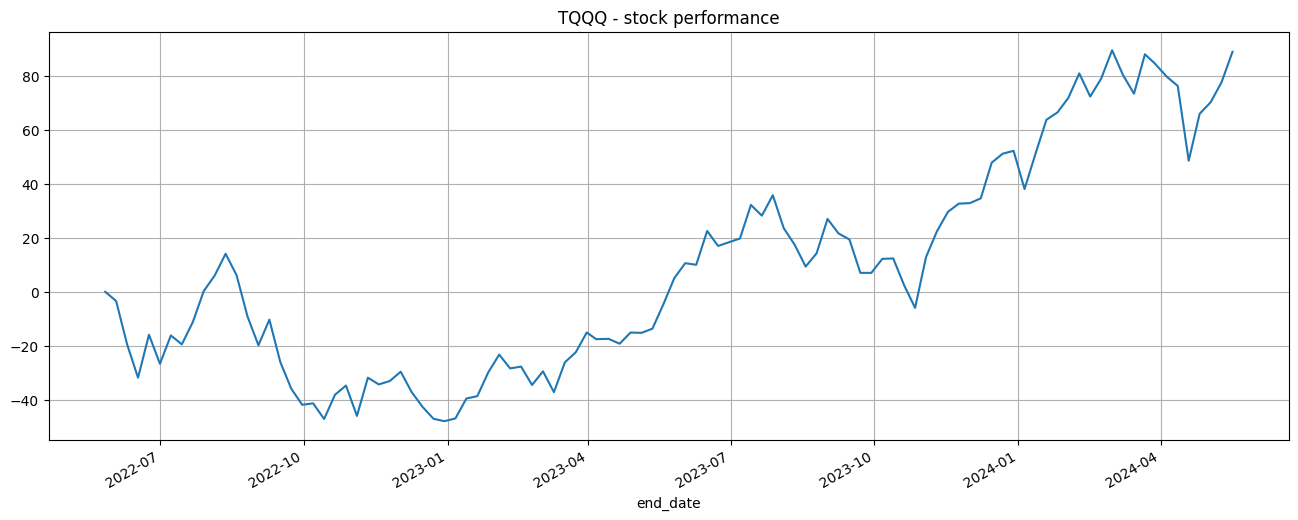

In [9]:
df = pd.read_csv(f'data/{symbol}/1w.csv')
df.end_date = pd.to_datetime(df.end_date)
df = df.set_index('end_date')

plt.figure(figsize=(16,6))
plt.title(symbol + ' - stock performance')
base = df.stock_end_price.iloc[0]
df['pct']=df.stock_end_price / base - 1
(df.pct * 100).plot()
plt.grid()